In [84]:
import numpy as np
from enum import Enum

In [85]:
class Action(Enum):
    NORTH = (0, 1)
    SOUTH = (0, -1)
    EAST = (1, 0)
    WEST = (-1, 0)


def reward(s, a):
    if s == (0, 1):
        return 10, (4, 1)
    elif s == (0, 3):
        return 5, (2, 3)
    elif s[0] + a[0] < 0 or s[0] + a[0] > 4 or s[1] + a[1] < 0 or s[1] + a[1] > 4:
        return -1, s
    else:
        return 0, (s[0] + a[0], s[1] + a[1])

![image](./bellman.png)

In [86]:
v = np.zeros((5, 5))
s = (2, 2)
gamma = .9
action_p = .25
policy = np.zeros(5, 5)

def update_v(s):
    new_vs = 0
    for a in Action:
        temp, next_s = reward(s, a.value)
        temp += gamma * v[next_s[0], next_s[1]]
        new_vs += action_p * temp
    return new_vs


In [87]:
checkpoints = []
for i in range(50):
    for x in range(5):
        for y in range(5):
            v[x][y] = update_v((x, y))
    checkpoints.append(np.round(v, 1))
print(np.round(v, 1))

[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.5]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]


![image](./target.png)

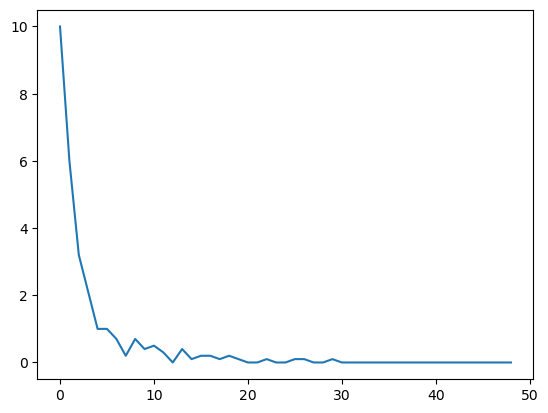

In [88]:
import matplotlib.pyplot as plt

diffs = []
for i in range(1, len(checkpoints)):
    diffs.append(np.sum(np.abs(checkpoints[i] - checkpoints[i - 1])))

plt.plot(diffs)